In [1]:
import re
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image

passagem = pd.read_csv('data/2019_Passagem.csv', sep=';',encoding='cp1252', 
                       index_col=['Identificador do processo de viagem'],decimal=',')
pagamento = pd.read_csv('data/2019_Pagamento.csv', sep=';',encoding='cp1252', 
                        index_col=['Identificador do processo de viagem'],decimal=',')
trecho = pd.read_csv('data/2019_Trecho.csv', sep=';',encoding='cp1252', 
                     index_col=['Identificador do processo de viagem '],decimal=',')
viagem = pd.read_csv('data/2019_Viagem.csv', sep=';',encoding='cp1252', 
                     index_col=['Identificador do processo de viagem'],decimal=',')

outl_filter = 83000
outl_filtered = ((viagem['Valor diárias'] < outl_filter)&
(viagem['Valor passagens'] < outl_filter)&
(viagem['Valor outros gastos'] < outl_filter))

not_only_zero = ((viagem['Valor diárias'] > 0)|
(viagem['Valor passagens'] > 0)|
(viagem['Valor outros gastos'] > 0))

/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



### Pagamento

* **Identificador do processo de viagem**: Número que identifica o processo de concessão da viagem  
* **Código do Órgão Superior**: Código do Órgão Superior que custeou a despesa. ÓRGÃO SUPERIOR - Unidade da Administração Direta que tenha entidades por ele supervisionadas. Fonte: Manual do SIAFI
* **Nome Órgão Superior**: Nome do Órgão Superior
* **Código Órgão Pagador**: Código do Órgão que pagou a despesa. ÓRGÃO SUBORDINADO - Entidade supervisionada por um Órgão da Administração Direta. Fonte: Manual do SIAFI
* **Nome Órgão Pagador**: Nome do Órgão
* **Código UG Pagadora**: Código da Unidade Gestora que pagou a despesa. UNIDADE GESTORA (UG) - Unidade Orçamentária ou Administrativa que realiza atos de gestão orçamentária, financeira e/ou patrimonial, cujo titular, em consequência, está sujeito a tomada de contas anual na conformidade do disposto nos artigos 81 e 82 do Decreto-lei nr. 200, de 25 de fevereiro de 1967. Fonte: Manual do SIAFI
* **Nome UG Pagadora**: Nome da Unidade Gestora
* **Tipo de Pagamento**: Tipo da despesa paga pelo órgão (diária, passagem, seguro, etc.)
* **Valor da Despesa**: Valor da despesa paga

In [4]:
#pagamento.head()

### Passagem

* **Identificador do processo de viagem**: Número que identifica o processo de concessão da viagem  
* **Meio de transporte**: Meio de transporte da passagem
* **País – Origem Ida**: País de origem na ida
* **UF - Origem Ida**: UF de origem na ida
* **Cidade - Origem Ida**: Cidade de origem na ida
* **País - Destino Ida**: País de destino na ida
* **UF – Destino Ida**: UF de destino na ida
* **Cidade – Destino Ida**: Cidade de destino na ida
* **País – Origem Volta**: País de origem na volta
* **UF - Origem Volta**: UF de origem na volta
* **Cidade - Origem Volta**: Cidade de origem na volta
* **País - Destino Volta**: País de destino na volta
* **UF – Destino Volta**: UF de destino na volta
* **Cidade – Destino Volta**: Cidade de destino na volta
* **Valor da passagem**: Valor da passagem
* **Taxa de serviço**: Taxa de serviço da passagem

In [5]:
#passagem.head()

### Trecho

* **Identificador do processo de viagem**: Número que identifica o processo de concessão da viagem   
* **Sequência Trecho**: Sequência do trecho na viagem
* **Origem - Data**: Data de saída da origem
* **Origem – País**: País de origem
* **Origem – UF**: UF de origem
* **Origem – Cidade**: Cidade de origem
* **Destino - Data**: Data de chegada no destino
* **Destino – País**: País de destino
* **Destino – UF**: UF de destino
* **Destino – Cidade**: Cidade de destino
* **Meio de transporte**: Meio de transporte da origem para o destino
* **Número Diárias**: Número de diárias do trecho
* **Missão?**: Houve missão no trecho? ‘Sim’ ou ‘Não’

In [6]:
#trecho.head()

### Viagem

* **Identificador do processo de viagem**: Número que identifica o processo de concessão da viagem   
* **Situação**: Situação da viagem: ´não realizada´; ´realizada’
* **Código do Órgão Superior**: Código do Órgão Superior que custeou despesas da viagem. ÓRGÃO SUPERIOR - Unidade da Administração Direta que tenha entidades por ele supervisionadas. Fonte: Manual do SIAFI
* **Nome Órgão Superior**: Nome do Órgão Superior
* **Código Solicitante**: Código do Órgão que solicitou a viagem. ÓRGÃO SUBORDINADO - Entidade supervisionada por um Órgão da Administração Direta. Fonte: Manual do SIAFI
* **Nome Órgão Solicitante**: Nome do Órgão
* **CPF viajante**: CPF da pessoa que realizou a viagem
* **Nome**: Nome do viajante
* **Cargo**: Cargo do viajante
* **Período - Data de início**: Data de início de afastamento do servidor
* **Período - Data de fim**: Data de fim de afastamento do servidor
* **Destinos**: Locais pelos quais o viajante passará durante a viagem
* **Motivo**: Motivo da viagem
* **Valor Diárias**: Valor de diárias pagas pelo órgão, se houver
* **Valor Passagens**: Valor de passagens pagas pelo órgão, se houver
* **Valor Outros Gastos**: Valor de outros gastos pagos pelo órgão, se houver

In [2]:
viagem.head()

,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
Identificador do processo de viagem,,,,,,,,,,,,,,,
15045825,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.377.624-**,MARINA FERREIRA KITAZONO ANTUNES,NaN,06/02/2019,07/02/2019,Recife/PE,Regresso de bolsista CAPES do exterior- PE ( P...,0.0,3406.33,0.0
15100682,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.831.975-**,JORGE ANDRE DE CARVALHO MENDONCA,NaN,01/02/2019,02/02/2019,Recife/PE,Capacitação PDSE (Programa de Doutorado Sanduí...,0.0,2925.83,0.0
15114708,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.325.718-**,MARCO ANTONIO COUTO JUNIOR,PESQUISADOR EM GEOCIENCIA,01/02/2019,01/02/2019,São Paulo/SP,Capacitação no exterior - PDSE,0.0,2760.02,0.0
15163874,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.003.005-**,OLIVAL FREIRE JUNIOR,PROFESSOR DO MAGISTERIO SUPERIOR,17/02/2019,18/02/2019,Salvador/BA,Programa de Professor Visitante no Exterior - ...,0.0,2875.92,0.0
15166192,Realizada,26000,Ministério da Educação,26291,Fundação Coordenação de Aperfeiçoamento de Pes...,***.660.311-**,CARINA MENDES DOS SANTOS MELO,TECNICO I,20/02/2019,21/02/2019,Rio de Janeiro/RJ,Capacitação no exterior - PDSE.,0.0,2420.48,0.0


## Let's analyze

In [3]:
print('Len of each dataset: \n\tPagamento: {}\n\tPassagem: {} \n\tTrecho: {} \n\tViagem: {}'.
      format(len(pagamento), len(passagem), len(trecho), len(viagem)))
idx_pag, idx_pas, idx_tre, idx_via = set(pagamento.index), set(passagem.index), set(trecho.index), set(viagem.index)
print('Len of unique index of each dataset: \n\tPagamento: {}\n\tPassagem: {} \n\tTrecho: {} \n\tViagem: {}'.
      format(len(idx_pag), len(idx_pas), len(idx_tre), len(idx_via)))

Len of each dataset: 
	Pagamento: 1229537
	Passagem: 394714 
	Trecho: 1583957 
	Viagem: 762239
Len of unique index of each dataset: 
	Pagamento: 702852
	Passagem: 216020 
	Trecho: 652978 
	Viagem: 762239


In [4]:
'''
aaa = 2019001921
display(viagem[viagem.index == aaa])
display(trecho[trecho.index == aaa])
display(pagamento[pagamento.index == aaa])
display(passagem[passagem.index == aaa])
'''
#viagem[viagem.index.isin(ids_list)][(viagem['Valor diárias'] == 0)&(viagem['Valor passagens'] == 0)&(viagem['Valor outros gastos'] == 0)]
aaa = ':D'

In [5]:
viagem.describe()

,Código do órgão superior,Código órgão solicitante,Valor diárias,Valor passagens,Valor outros gastos
count,762239.000000,762239.000000,762239.000000,762239.000000,7.622390e+05
mean,30621.293020,30632.787695,942.513873,590.973593,3.051854e+01
std,13909.548612,13770.301815,3552.759926,1281.939721,8.129940e+03
min,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00
25%,25000.000000,25205.000000,88.500000,0.000000,0.000000e+00
50%,26000.000000,26429.000000,431.300000,0.000000,0.000000e+00
75%,38000.000000,37202.000000,808.500000,907.140000,0.000000e+00
max,63000.000000,91214.000000,104793.110000,155531.360000,7.096160e+06


In [6]:
print('Total de gastos com situação realiza: {}'.format(viagem[viagem['Situação'] == 'Realizada']['Valor diárias'].sum() + 
 viagem[viagem['Situação'] == 'Realizada']['Valor passagens'].sum() + 
 viagem[viagem['Situação'] == 'Realizada']['Valor outros gastos'].sum()))
print('1.163.471.765,73')

Total de gastos com situação realiza: 1163471765.7300003
1.163.471.765,73


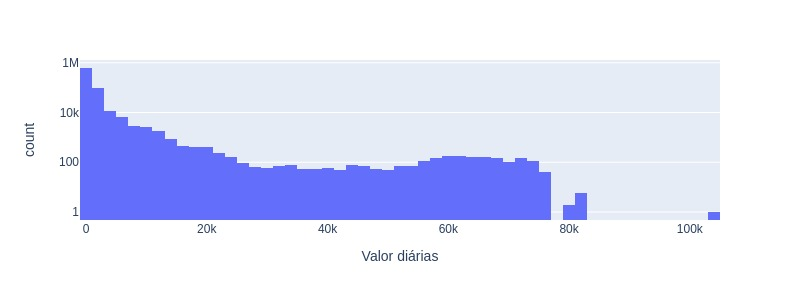

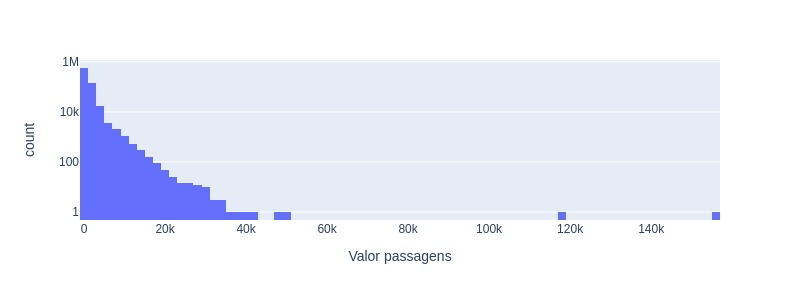

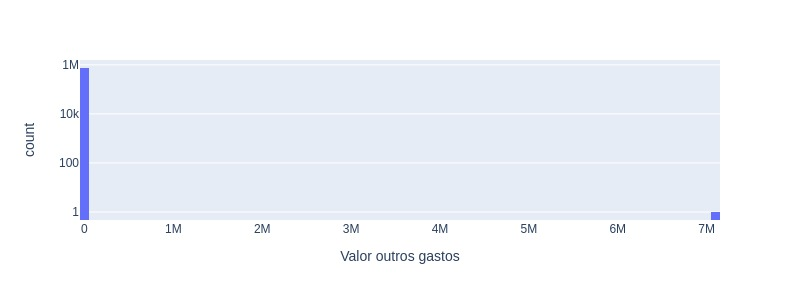

In [37]:
for enu, f in enumerate(['Valor diárias', 'Valor passagens', 'Valor outros gastos']):
    fig = px.histogram(viagem[viagem['Situação'] == 'Realizada'], 
                       x=f, 
                       log_y=True, # represent bars with log scale
                       nbins=100,                       
                      )
    fig['layout'].update(height=300, width=800)
    display(Image(fig.to_image('jpg')))

Temos nos três valores muito distântes da distribuição, provavelmente esses outliers são dados incluídos erroneamente. Retirando esses dados podemos ver uma distribuição mais clara apesar de ser necessário incluir uma escala logaritmica.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



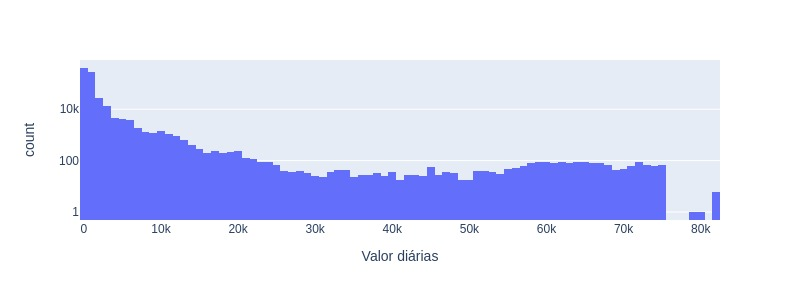

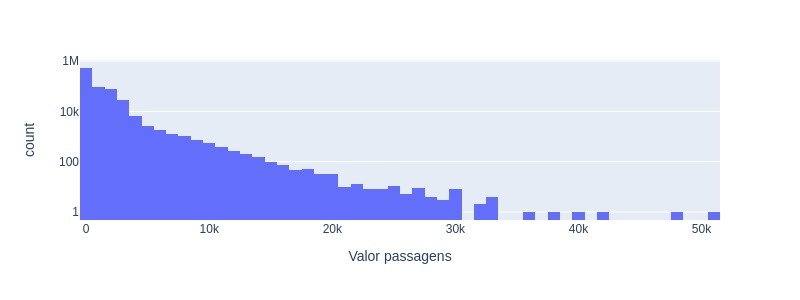

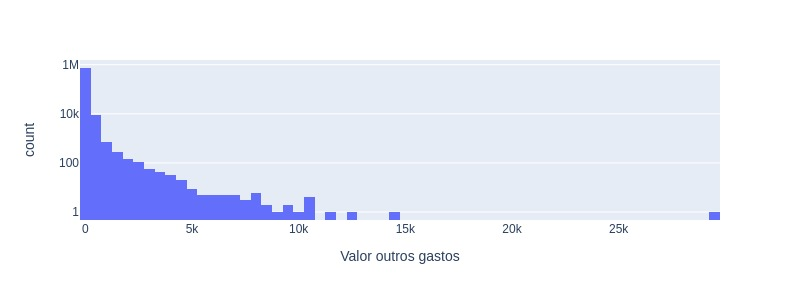

In [39]:
for enu, f in enumerate(['Valor diárias', 'Valor passagens', 'Valor outros gastos']):
    remove_out = [83000, 83000, 83000]#[83000, 53000, 30500]
    fig = px.histogram(viagem[viagem['Situação'] == 'Realizada'][viagem[f] <= remove_out[enu]], 
                       x=f, 
                       log_y=True, # represent bars with log scale
                       nbins=100,                       
                      )
    fig['layout'].update(height=300, width=800)
    display(Image(fig.to_image('jpg')))

Vamos analizar esses outliers, verificar os registros nas outras tabelas. 

Aparentemente há alguns erros de digitação, em especial relacionada a outras despesas. De toda forma, com exceção do registro sigiloso todos partiram do Distrito Federal.

In [40]:
outliers = {}
out_idx = []
for enu, f in enumerate(['Valor diárias', 'Valor passagens', 'Valor outros gastos']):
    remove_out = [83000, 83000, 83000]
    outliers[f] = viagem[viagem['Situação'] == 'Realizada'][viagem[f] > remove_out[enu]].index.values
    for i in outliers[f]:
        out_idx.append(i)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [41]:
def print_viagem(i):
    vi = viagem[viagem.index == i]
    print('------------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------------')
    print('id: {} - nome: {}'.format(vi.index[0], vi['Nome'].values[0]))
    print('cpf: {} - cargo: {}'.format(vi['CPF viajante'].values[0], 
                                       vi['Cargo'].values[0]))
    print('------------------------------------------------------------------------------------------')
    print('Código do órgão superior: {} - Nome do órgão superior: {}'.format(vi['Código do órgão superior'].values[0],
                                                                             vi['Nome do órgão superior'].values[0]))
    print('Código órgão solicitante: {} - Nome órgão solicitante: {}'.format(vi['Código órgão solicitante'].values[0],
                                                                             vi['Nome órgão solicitante'].values[0]))
    print('Data ini: {} - Data fim: {}'.format(vi['Período - Data de início'].values[0], 
                                               vi['Período - Data de fim'].values[0]))
    print('Motivo da viagem: {}'.format(vi['Motivo'].values[0]))

    print('Vr. diárias: {}'.format(vi['Valor diárias'].values[0]))
    print('Vr. passagens: {}'.format(vi['Valor passagens'].values[0]))
    print('Vr. outros: {}'.format(vi['Valor outros gastos'].values[0]))
    
def print_trecho(i):
    print('## {} ##'.format(i[1]))
    print('## Origem {}'.format(i[2]))
    print('{} - {} - {}'.format(i[3],i[4],i[5]))
    print('## Destino {}'.format(i[6]))
    print('{} - {} - {}'.format(i[7],i[8],i[9]))
    print('Meio de transporte: {}'.format(i[10]))
    print('Diárias: {}'.format(i[11]))
    print('Missão: {}'.format(i[12]))
    
def print_pagamento(i):
    print('Cod Unidade Pagadora: {} - Nome: {}'.format(i[5], i[6]))
    print('Tipo: {}'.format(i[7]))
    print('Valor: {}'.format(i[8]))
    
def print_passagem(i):
    print('Meio: {}'.format(i[1]))
    print('{} - {} - {} -> {} - {} - {}'.format(i[2],i[3],i[4],i[5],i[6],i[7]))
    print('{} - {} - {} -> {} - {} - {}'.format(i[8],i[9],i[10],i[11],i[12],i[13]))
    print('Valor: {}'.format(i[14]))
    print('Taxa: {}'.format(i[15]))
    
def print_data(i):
    print_viagem(i)

    for tr in trecho[trecho.index == i].sort_values(['Sequência Trecho']).itertuples():
        print('-----------------------------------------TRECHO-------------------------------------------')
        tr = list(tr)
        print_trecho(tr)

    for pg in pagamento[pagamento.index == i].itertuples():
        print('---------------------------------------PAGAMENTO------------------------------------------')
        pg = list(pg)
        print_pagamento(pg)

    for pg in passagem[passagem.index == i].itertuples():
        print('----------------------------------------PASSAGEM------------------------------------------')
        pg = list(pg)
        print_passagem(pg)                    

In [42]:
out_idx

[16099936, 16154465, 16253216, 15805805]

In [14]:
print_data(16099936)

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
id: 16099936 - nome: Informações protegidas por sigilo
cpf: ***.000.000-** - cargo: Informações protegidas por sigilo
------------------------------------------------------------------------------------------
Código do órgão superior: 30000 - Nome do órgão superior: Ministério da Justiça e Segurança Pública
Código órgão solicitante: 30108 - Nome órgão solicitante: Departamento de Polícia Federal
Data ini: 01/06/2019 - Data fim: 02/12/2019
Motivo da viagem: Informação protegida por sigilo nos termos da legislação vigente
Vr. diárias: 104793.11
Vr. passagens: 8023.71
Vr. outros: 6395.73
---------------------------------------PAGAMENTO------------------------------------------
Cod Unidade Pagadora: -11 - Nome: Sigilosa
Tipo: PASSAGEM
Valor: 8023.71
---------------------------------------PAGAMENTO--------------

In [15]:
print_data(16154465)

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
id: 16154465 - nome: CARLOS EDUARDO QUINTANILHA VAZ DE OLIVEIRA
cpf: ***.493.141-** - cargo: TECNOLOGISTA
------------------------------------------------------------------------------------------
Código do órgão superior: 24000 - Nome do órgão superior: Ministério da Ciência, Tecnologia, Inovações e Comunicações
Código órgão solicitante: 20402 - Nome órgão solicitante: Agência Espacial Brasileira
Data ini: 09/06/2019 - Data fim: 16/06/2019
Motivo da viagem: Compor a delegação brasileira que participará da Reunião Plenária da ISO  TC20/SC14 - Space Systems and Operations, no período de 09 a 16 de junho de 2019, em Londres - Inglaterra, trânsito já incluído, com ônus.
Vr. diárias: 10761.28
Vr. passagens: 155531.36
Vr. outros: 0.0
-----------------------------------------TRECHO--------------------------------

In [16]:
print_data(16253216)

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
id: 16253216 - nome: LUCIANA MOURAO CERQUEIRA E SILVA
cpf: ***.902.886-** - cargo: nan
------------------------------------------------------------------------------------------
Código do órgão superior: 26000 - Nome do órgão superior: Ministério da Educação
Código órgão solicitante: 26291 - Nome órgão solicitante: Fundação Coordenação de Aperfeiçoamento de Pessoal de Nível Superior
Data ini: 16/07/2019 - Data fim: 19/07/2019
Motivo da viagem: Preparatório Seminário Psicologia
Vr. diárias: 879.7
Vr. passagens: 117096.47
Vr. outros: 0.0
-----------------------------------------TRECHO-------------------------------------------
## 1 ##
## Origem 16/07/2019
Brasil - Rio de Janeiro - Rio de Janeiro
## Destino 19/07/2019
Brasil - Distrito Federal - Brasília
Meio de transporte: Aéreo
Diárias: 3.0
Missão: Sim
-----

In [17]:
print_data(15805805)

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
id: 15805805 - nome: MURILO JOSE PERINI DA SILVA BRAGA
cpf: ***.047.737-** - cargo: AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL
------------------------------------------------------------------------------------------
Código do órgão superior: 25000 - Nome do órgão superior: Ministério da Economia
Código órgão solicitante: 25000 - Nome órgão solicitante: Ministério da Economia - Unidades com vínculo direto
Data ini: 09/02/2019 - Data fim: 11/02/2019
Motivo da viagem: PARTICIPAR DO 31º ENCONTRO DE REVISÃO PELOS PARES EM PROCESSO CAPITANEADO PELO FÓRUM GLOBAL SOBRE TRANSPARÊNCIA E INTERCÂMBIO DE INFORMAÇÕES TRIBUTÁRIAS EM PARIS/FRANÇA.
Vr. diárias: 8331.92
Vr. passagens: 3930.14
Vr. outros: 7096160.27
-----------------------------------------TRECHO-------------------------------------------
## 1 ##
## Origem 09

## Agrupar por viajante

In [43]:
viagem_nome = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Nome', 'CPF viajante']).agg(
        ct=('Nome','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum')).reset_index()
viagem_nome['vr_total'] = viagem_nome['vr_diarias'] + viagem_nome['vr_passagens'] + viagem_nome['vr_outros']

viagem_nome = viagem_nome.sort_values(['vr_total'], ascending=False)
viagem_nome

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Nome,CPF viajante,ct,vr_diarias,vr_passagens,vr_outros,vr_total
88487,Informações protegidas por sigilo,***.000.000-**,86052,1.300856e+08,4.441281e+07,1374781.58,1.758732e+08
24858,BENTO COSTA LIMA LEITE DE ALBUQUERQUE JUNIOR,***.593.277-**,55,1.220097e+05,2.741467e+05,6229.78,4.023862e+05
45245,DECIO FABRICIO ODDONE DA COSTA,***.112.110-**,49,9.074483e+04,1.916900e+05,18422.07,3.008569e+05
132605,MARCOS CESAR PONTES,***.971.638-**,46,1.526832e+05,1.213155e+05,10730.37,2.847291e+05
59181,ERIVALDO ALFREDO GOMES,***.969.471-**,15,1.367326e+05,1.276497e+05,1329.35,2.657117e+05
...,...,...,...,...,...,...,...
200225,YOABRI DEL CARMEN MARQUEZ YEGUEZ,***.697.732-**,1,0.000000e+00,1.000000e-02,0.00,1.000000e-02
79641,GUSTAVO ATHAYDE MARCONDES,***.119.017-**,1,0.000000e+00,1.000000e-02,0.00,1.000000e-02
138507,MARIA ROSA BATISTA MACIEL,***.345.923-**,1,0.000000e+00,1.000000e-02,0.00,1.000000e-02
17769,ANGEL MATHIAS MARTINEZ GUERRERO,***.837.892-**,1,0.000000e+00,1.000000e-02,0.00,1.000000e-02


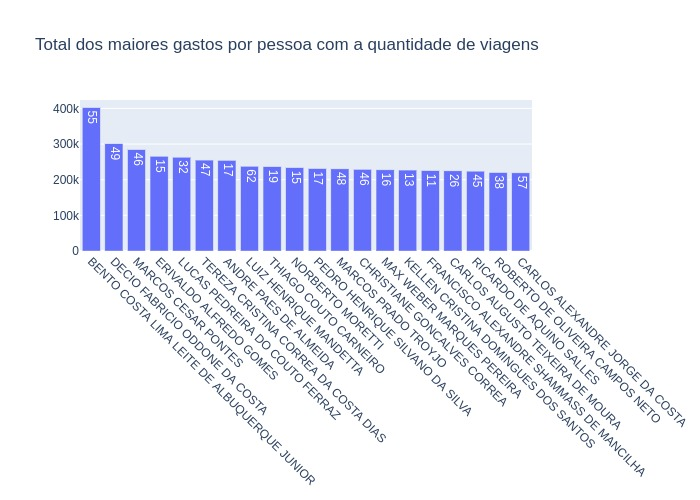

In [45]:
bars = go.Bar(x=viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo']['Nome'].head(20), 
              y=viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo']['vr_total'].head(20),
              text=viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo']['ct'].head(20),
              textposition='auto',
              name='Viajantes')
layout = go.Layout(height=500, width=700)
fig = go.Figure(data=[bars], layout=layout)

fig.update_layout(title = 'Total dos maiores gastos por pessoa com a quantidade de viagens', xaxis_tickangle=45)

display(Image(fig.to_image('jpg')))
#fig.show()

In [47]:
#com_bolso = viagem[viagem['Motivo'].fillna('').str.contains('Bolsonaro', flags=re.IGNORECASE, regex=True)]
viagem_nome[viagem_nome['Nome'] != 'Informações protegidas por sigilo'].describe()

,ct,vr_diarias,vr_passagens,vr_outros,vr_total
count,200887.000000,200887.000000,200887.000000,200887.000000,200887.000000
mean,3.105721,2900.369560,1932.597492,45.785292,4878.752344
std,4.637787,7767.342761,4918.435234,253.973597,10658.925329
min,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,380.040000,0.000000,0.000000,701.420000
50%,2.000000,952.440000,93.100000,0.000000,1959.200000
75%,3.000000,2365.525000,2037.340000,0.000000,4425.000000
max,162.000000,152683.160000,274146.670000,29546.000000,402386.160000


In [48]:
valor_total_sigilo = viagem_nome[viagem_nome['Nome'] == 'Informações protegidas por sigilo']['vr_total'].values[0]
valor_total = viagem_nome['vr_total'].sum()
print('valor gasto sigiloso: {:.2f}'.format(valor_total_sigilo))
print('percentual do valor sigiloso sobre o total: {:.2f}%'.format(valor_total_sigilo*100/valor_total))

valor gasto sigiloso: 175873203.74
percentual do valor sigiloso sobre o total: 15.21%


## Agrupar por Cargo

In [62]:
viagem_cargo = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Cargo']).agg(
        ct=('Cargo','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum')).reset_index()
viagem_cargo['vr_total'] = viagem_cargo['vr_diarias'] + viagem_cargo['vr_passagens'] + viagem_cargo['vr_outros']

viagem_cargo = viagem_cargo.sort_values(['vr_total'], ascending=False)
viagem_cargo

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Cargo,ct,vr_diarias,vr_passagens,vr_outros,vr_total
487,Informações protegidas por sigilo,86052,1.300856e+08,4.441281e+07,1374781.58,1.758732e+08
620,PROFESSOR DO MAGISTERIO SUPERIOR,55643,3.963451e+07,3.643979e+07,758623.34,7.683292e+07
621,PROFESSOR ENS BASICO TECN TECNOLOGICO,36454,1.757347e+07,1.172507e+07,651074.60,2.994961e+07
748,TECNICO DO SEGURO SOCIAL,13351,1.754987e+07,4.932354e+06,749185.42,2.323141e+07
233,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,13184,8.726443e+06,1.007990e+07,382357.23,1.918870e+07
...,...,...,...,...,...,...
638,PROGRAMADOR SENIOR,1,6.768000e+01,0.000000e+00,0.00,6.768000e+01
550,OPERADOR DE COMPUTA??O,1,6.768000e+01,0.000000e+00,0.00,6.768000e+01
157,ARTIFICE DE ELETRICIDADE,1,6.228000e+01,0.000000e+00,0.00,6.228000e+01
378,DIRETOR DE PROGRAMAS,1,6.063000e+01,0.000000e+00,0.00,6.063000e+01


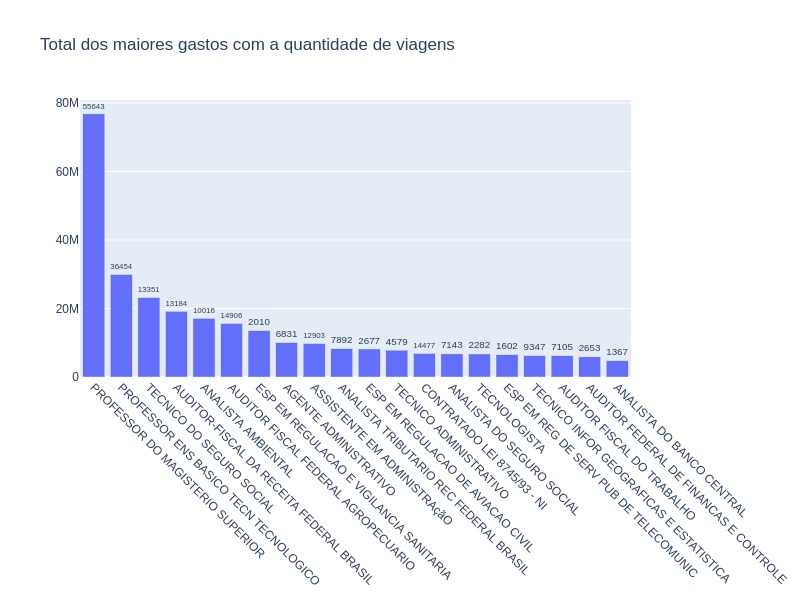

In [52]:
bars = go.Bar(x=viagem_cargo[viagem_cargo['Cargo'] != 'Informações protegidas por sigilo']['Cargo'].head(20), 
              y=viagem_cargo[viagem_cargo['Cargo'] != 'Informações protegidas por sigilo']['vr_total'].head(20),
              text=viagem_cargo[viagem_cargo['Cargo'] != 'Informações protegidas por sigilo']['ct'].head(20),
              textposition='outside',
              name='Cargos')
layout = go.Layout(height=600, width=800)
fig = go.Figure(data=[bars], layout=layout)

fig.update_layout(title = 'Total dos maiores gastos com a quantidade de viagens', xaxis_tickangle=45)

display(Image(fig.to_image('jpg')))
#fig.show()

In [53]:
viagem_cargo[viagem_cargo['Cargo'] != 'Informações protegidas por sigilo'].describe()

,ct,vr_diarias,vr_passagens,vr_outros,vr_total
count,892.000000,8.920000e+02,8.920000e+02,892.000000,8.920000e+02
mean,455.701794,3.226569e+05,2.460854e+05,7634.674148,5.763770e+05
std,2614.916204,1.763688e+06,1.469000e+06,48918.972812,3.229123e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000,4.045000e+01
25%,4.000000,2.369160e+03,1.149007e+03,0.000000,4.891275e+03
50%,18.000000,1.399112e+04,7.414100e+03,49.135000,2.206611e+04
75%,114.250000,8.662824e+04,5.328813e+04,1130.520000,1.576753e+05
max,55643.000000,3.963451e+07,3.643979e+07,758623.340000,7.683292e+07


## Agrupar por situação

In [98]:
viagem_situacao = viagem[outl_filtered][not_only_zero].groupby(
        ['Situação']).agg(
        ct=('Situação','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum')).reset_index()
viagem_situacao['vr_total'] = viagem_situacao['vr_diarias'] + viagem_situacao['vr_passagens'] + viagem_situacao['vr_outros']

viagem_situacao = viagem_situacao.sort_values(['vr_total'], ascending=False)
viagem_situacao

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Situação,ct,vr_diarias,vr_passagens,vr_outros,vr_total
1,Realizada,709955,7.127331e+08,4.326543e+08,10572451.60,1.155960e+09
0,Não realizada,15959,5.562931e+06,1.752426e+07,5587411.84,2.867461e+07


In [106]:
print('Percentual da quantidade de registros "Não realizado": {}'.format(viagem_situacao[viagem_situacao.index == 0]['ct'].values/viagem_situacao[viagem_situacao.index == 1]['ct'].values *100))
print('Percentual do valor total "Não realizado": {}'.format(viagem_situacao[viagem_situacao.index == 0]['vr_total'].values/viagem_situacao[viagem_situacao.index == 1]['vr_total'].values *100))

Percentual da quantidade de registros "Não realizado": [2.24788895]
Percentual do valor total "Não realizado": [2.4805884]


### Perfil das situações não realizadas

In [61]:
viagem[viagem['Situação'] != 'Realizada']

,Situação,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
Identificador do processo de viagem,,,,,,,,,,,,,,,
15233002,Não realizada,52000,Ministério da Defesa,52121,Comando do Exército,***.218.347-**,MARCOS ANTONIO AMARO DOS SANTOS,NaN,08/01/2019,11/01/2019,"Porto Alegre/RS, Curitiba/PR",O Exmo Sr Gen Ex MARCOS ANTONIO AMARO DOS SANT...,0.0,1236.38,0.0
15387556,Não realizada,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.227.354-**,LUCIO CAMARA E SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,18/02/2019,20/02/2019,Brasília/DF,Participação na banca de defesa de dissertação...,0.0,672.60,0.0
15393655,Não realizada,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.849.058-**,CESAR DE OLIVEIRA LIMA BARRIO,CONSELHEIRO,23/01/2019,29/01/2019,Paris/França,"Remoção p/ BRASUNESCO, conforme BS 110/18",0.0,3463.12,0.0
15429932,Não realizada,26000,Ministério da Educação,26242,Universidade Federal de Pernambuco,***.181.146-**,ANITA MATILDE SILVA LEANDRO,PROFESSOR DO MAGISTERIO SUPERIOR,26/03/2019,30/03/2019,Recife/PE,PARTICIPAÇÃO NA JORNADA DE ESTUDOS DOCUMENTÁRI...,0.0,810.42,0.0
15462030,Não realizada,26000,Ministério da Educação,26242,Universidade Federal de Pernambuco,***.150.627-**,MARIA RITA LUSTOSA BYINGTON,NaN,24/02/2019,02/03/2019,Recife/PE,Ministrar o Módulo Teórico de ANÁLISE DE SOBRE...,0.0,1084.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019001664,Não realizada,25000,Ministério da Economia,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.240.887-**,FERNANDA FEITOSA NECHIO,DIRETOR DO BANCO CENTRAL,12/09/2019,13/09/2019,Sem informação,'Participa do evento Fatos Reais - Evento de c...,0.0,1097.80,0.0
2019001845,Não realizada,25000,Ministério da Economia,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.717.341-**,DIOGO JOSE SOUSA DA SILVA,ANALISTA DO BANCO CENTRAL,15/10/2019,17/10/2019,Sem informação,"Participar, como palestrante, no evento Privac...",0.0,1069.80,0.0
2019001886,Não realizada,25000,Ministério da Economia,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.099.587-**,BRUNO SILVA MARTINS,ANALISTA DO BANCO CENTRAL,28/10/2019,01/11/2019,Sem informação,Apresentar artigo no 'XXIV Meeting of the Cent...,0.0,2077.38,0.0


## Agrupar por Nome do órgão superior pagante e solicitante

In [56]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Nome do órgão superior']).agg(
        ct=('Nome do órgão superior','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Nome do órgão superior,ct,vr_diarias,vr_passagens,vr_outros,vr_total
22,Sem informação,57721,1.814083e+08,4.932310e+07,1581136.90,2.323126e+08
8,Ministério da Educação,195895,1.024519e+08,9.688282e+07,2611335.44,2.019461e+08
11,Ministério da Justiça e Segurança Pública,90268,1.314987e+08,4.137523e+07,1262677.07,1.741366e+08
6,Ministério da Defesa,117133,9.226414e+07,7.097366e+07,918240.57,1.641560e+08
7,Ministério da Economia,68250,4.979664e+07,2.568992e+07,2024934.72,7.751150e+07
12,Ministério da Saúde,42040,2.869730e+07,2.969101e+07,379322.53,5.876764e+07
2,"Ministério da Agricultura, Pecuária e Abasteci...",39775,2.718571e+07,1.451448e+07,259688.96,4.195988e+07
17,Ministério do Meio Ambiente,22958,2.594036e+07,1.407399e+07,359441.07,4.037379e+07
10,Ministério da Infraestrutura,17975,1.449054e+07,1.691411e+07,243903.20,3.164855e+07
4,"Ministério da Ciência, Tecnologia, Inovações e...",11874,1.464685e+07,1.564836e+07,206873.41,3.050208e+07


In [57]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Nome órgão solicitante']).agg(
        ct=('Nome órgão solicitante','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Nome órgão solicitante,ct,vr_diarias,vr_passagens,vr_outros,vr_total
138,Sem informação,57721,1.814083e+08,4.932310e+07,1581136.90,2.323126e+08
29,Departamento de Polícia Federal,47583,7.078553e+07,2.133469e+07,505683.77,9.262590e+07
18,Comando da Aeronáutica,62412,4.900494e+07,3.703098e+07,280052.20,8.631597e+07
30,Departamento de Polícia Rodoviária Federal,33771,4.688397e+07,1.671778e+07,702965.90,6.430472e+07
19,Comando do Exército,49600,3.701390e+07,2.208331e+07,293647.03,5.939086e+07
...,...,...,...,...,...,...
13,Caixa de Financiamento Imobiliário da Aeronáutica,35,1.669127e+04,3.140738e+04,0.00,4.809865e+04
11,Autoridade Pública Olímpica,6,3.102690e+03,2.133500e+04,0.00,2.443769e+04
121,Ministério da Cultura - Unidades com vínculo d...,2,9.104200e+02,5.256200e+03,0.00,6.166620e+03
132,Ministério do Esporte - Unidades com vínculo d...,2,9.355000e+02,3.828130e+03,0.00,4.763630e+03


## Agrupar por Destinos

In [58]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Destinos']).agg(
        ct=('Destinos','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Destinos,ct,vr_diarias,vr_passagens,vr_outros,vr_total
13331,Informações protegidas por sigilo,86052,1.300856e+08,4.441281e+07,1374781.58,1.758732e+08
4263,Brasília/DF,56770,5.483602e+07,8.520079e+07,574896.46,1.406117e+08
24047,Rio de Janeiro/RJ,25871,1.713856e+07,2.886682e+07,210056.82,4.621544e+07
27885,São Paulo/SP,27665,1.659791e+07,2.462794e+07,605614.38,4.183146e+07
26033,Sem informação,23575,1.841377e+07,2.159496e+07,342509.34,4.035124e+07
...,...,...,...,...,...,...
21754,"Pitangueiras/SP, Sertãozinho/SP",1,0.000000e+00,0.000000e+00,12.40,1.240000e+01
9081,"Cubatão/SP, São Bernardo do Campo/SP",1,1.236000e+01,0.000000e+00,0.00,1.236000e+01
23708,"Ribeirão Preto/SP, Jaboticabal/SP",1,0.000000e+00,0.000000e+00,11.80,1.180000e+01
5270,"Brodósqui/SP, Sertãozinho/SP",1,0.000000e+00,0.000000e+00,11.80,1.180000e+01


## Agrupar por Data Início

In [59]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Período - Data de início']).agg(
        ct=('Período - Data de início','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Período - Data de início,ct,vr_diarias,vr_passagens,vr_outros,vr_total
358,31/01/2019,2952,1.065934e+08,1567153.03,324829.14,1.084854e+08
338,29/04/2019,3082,8.885930e+06,1379874.49,48315.97,1.031412e+07
255,22/04/2019,5494,5.249765e+06,3679748.45,78740.29,9.008254e+06
29,03/06/2019,4924,5.194381e+06,2940980.33,68714.95,8.204077e+06
298,25/11/2019,6409,4.779451e+06,3266934.08,92550.84,8.138936e+06
...,...,...,...,...,...,...
357,30/12/2019,238,8.752842e+04,13902.59,875.34,1.023063e+05
299,25/12/2019,79,3.623240e+04,51642.32,475.57,8.835029e+04
335,28/12/2019,55,2.509062e+04,25821.30,793.70,5.170562e+04
364,31/12/2019,36,4.670693e+04,2105.63,140.00,4.895256e+04


## Agrupar por Motivo

In [63]:
viagem_temp = viagem[viagem['Situação'] == 'Realizada'][outl_filtered][not_only_zero].groupby(
        ['Motivo']).agg(
        ct=('Motivo','count'),
        vr_diarias=('Valor diárias', 'sum'),
        vr_passagens=('Valor passagens', 'sum'),
        vr_outros=('Valor outros gastos','sum')).reset_index()
viagem_temp['vr_total'] = viagem_temp['vr_diarias'] + viagem_temp['vr_passagens'] + viagem_temp['vr_outros']

viagem_temp = viagem_temp.sort_values(['vr_total'], ascending=False)
viagem_temp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Motivo,ct,vr_diarias,vr_passagens,vr_outros,vr_total
127252,Informação protegida por sigilo nos termos da ...,86052,1.300856e+08,4.441281e+07,1374781.58,1.758732e+08
280399,Prestar apoio a Diretoria da Força Nacional de...,182,7.509125e+06,1.982904e+05,21900.80,7.729316e+06
146791,"Nova PCDP, após encerramento do exercício anua...",1746,5.105822e+06,1.046601e+04,4390.20,5.120678e+06
258279,Participação do proposto nos 7° Jogos Mundiais...,416,5.233482e+05,3.809438e+06,207784.54,4.540571e+06
60750,"CONSULTA MÉDICA, CONFORME ITEM 5.6.1, DA ICA 1...",697,9.173270e+03,1.338522e+06,0.00,1.347696e+06
...,...,...,...,...,...,...
96098,DEPENDENTE DO SERVIDOR QUE IRÁ Exercer Função ...,1,0.000000e+00,4.000000e-02,0.00,4.000000e-02
10778,A SERVIDORA TAINÁ LEANDRO (PCDP 1319/19) IRÁ A...,1,0.000000e+00,4.000000e-02,0.00,4.000000e-02
60764,"CONSULTA MÉDICA, PACIENTE MENOR DE 01 ANO, NAS...",1,0.000000e+00,2.000000e-02,0.00,2.000000e-02
10779,A SERVIDORA TAINÁ LEANDRO (PCDP 849/19) IRÁ AC...,1,0.000000e+00,2.000000e-02,0.00,2.000000e-02


In [117]:
viagem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762239 entries, 15045825 to 2019002869
Data columns (total 15 columns):
Situação                    762239 non-null object
Código do órgão superior    762239 non-null int64
Nome do órgão superior      762239 non-null object
Código órgão solicitante    762239 non-null int64
Nome órgão solicitante      762239 non-null object
CPF viajante                762235 non-null object
Nome                        762239 non-null object
Cargo                       534117 non-null object
Período - Data de início    762239 non-null object
Período - Data de fim       762239 non-null object
Destinos                    762239 non-null object
Motivo                      762238 non-null object
Valor diárias               762239 non-null float64
Valor passagens             762239 non-null float64
Valor outros gastos         762239 non-null float64
dtypes: float64(3), int64(2), object(10)
memory usage: 93.0+ MB
